In [110]:
from __future__ import absolute_import, division, print_function
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [111]:
from sql_conn import password
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine, Column, Integer, String, Float, Date
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [112]:
host="secondawsdb.caa0qcwnjnci.us-east-2.rds.amazonaws.com"
port=3307
dbname="stock_data"
user="root"
password=f"{password}"

# host="localhost"
# port=3306
# dbname="stock_data"
# user="root"
# password=f"{password}"

engine = create_engine(f"mysql://root:{password}@{host}:{port}/stock_data")

Base.metadata.create_all(engine)

from sqlalchemy.orm import Session
session = Session(engine)

Base.metadata.tables

immutabledict({})

In [115]:
ticker = "PG"

In [116]:
# sql_1 = (
#         f'SELECT * FROM stock_data.{ticker.lower()} '
#         f'INNER JOIN stock_data.{Measure.lower()}_{ticker.lower()} ON '
#         f'stock_data.{ticker.lower()}.Date=stock_data.{Measure.lower()}_{ticker.lower()}.date_key;')

In [117]:
stoch_sql = (f'SELECT * FROM stock_data.STOCH_{ticker}')
stoch = pd.read_sql(stoch_sql, engine)
stoch = stoch.drop(['level_0'], axis=1)

adx_sql = (f'SELECT * FROM stock_data.ADX_{ticker}')
adx = pd.read_sql(adx_sql, engine)
adx = adx.drop(['level_0', 'Symbol'], axis=1)

macd_sql = (f'SELECT * FROM stock_data.MACD_{ticker}')
macd = pd.read_sql(macd_sql, engine)
macd = macd.drop(['level_0', 'Symbol'], axis=1)

ema_sql = (f'SELECT * FROM stock_data.EMA_{ticker}')
ema = pd.read_sql(ema_sql, engine)
ema = ema.drop(['level_0', 'Symbol'], axis=1)

bbands_sql = (f'SELECT * FROM stock_data.BBANDS_{ticker}')
bbands = pd.read_sql(bbands_sql, engine)
bbands = bbands.drop(['level_0', 'Symbol'], axis=1)

rsi_sql = (f'SELECT * FROM stock_data.RSI_{ticker}')
rsi = pd.read_sql(rsi_sql, engine)
rsi = rsi.drop(['level_0', 'Symbol'], axis=1)

hist_sql = (f'SELECT * FROM stock_data.historical_data_{ticker}')
hist = pd.read_sql(hist_sql, engine)
hist = hist.drop(['ticker'], axis=1)

In [118]:
join1 = stoch.join(adx.set_index('index'), on='index')

join2 = join1.join(bbands.set_index('index'), on='index')

join3 = join2.join(ema.set_index('index'), on='index')

join4 = join3.join(macd.set_index('index'), on='index')

join5 = join4.join(rsi.set_index('index'), on='index')

stock_df = join5

In [119]:
stock_df = stock_df.drop(stock_df.index[0:32]).reset_index(drop=True)

stock_df = stock_df.rename(columns={'index':'Date'})

stock_combo = stock_df.set_index('Date').join(hist.set_index('Date'))
#msft_combo.head()

In [120]:
#Check Data Types
#msft_combo.dtypes

In [121]:
stock_combo['SlowK'] = stock_combo['SlowK'].astype(float)
stock_combo['SlowD'] = stock_combo['SlowD'].astype(float)
stock_combo['ADX'] = stock_combo['ADX'].astype(float)
stock_combo['Real Upper Band'] = stock_combo['Real Upper Band'].astype(float)
stock_combo['Real Middle Band'] = stock_combo['Real Middle Band'].astype(float)
stock_combo['Real Lower Band'] = stock_combo['Real Lower Band'].astype(float)
stock_combo['EMA'] = stock_combo['EMA'].astype(float)
stock_combo['MACD_Signal'] = stock_combo['MACD_Signal'].astype(float)
stock_combo['MACD_Hist'] =stock_combo['MACD_Hist'].astype(float)
stock_combo['MACD'] = stock_combo['MACD'].astype(float)
stock_combo['RSI'] = stock_combo['RSI'].astype(float)

In [122]:
stock_combo = stock_combo.drop(columns=["Symbol"])

In [123]:
stock_combo

,SlowK,SlowD,ADX,Real Middle Band,Real Lower Band,Real Upper Band,EMA,MACD_Hist,MACD_Signal,MACD,...,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
1998-03-03,34.5575,51.8855,14.3030,82.8360,78.8246,86.8474,82.7255,-0.0424,0.6172,0.5748,...,81.63,82.25,2067500.0,0.0,1.0,25.197515,25.387732,25.044115,25.234332,4135000.0
1998-03-04,11.3090,32.0642,13.8283,82.8770,78.9715,86.7825,82.6688,-0.1239,0.5862,0.4623,...,81.50,82.13,1300700.0,0.0,1.0,25.215924,25.234332,25.004231,25.197515,2601400.0
1998-03-05,16.3370,20.7345,13.4881,82.8925,79.0719,86.7131,82.4804,-0.2657,0.5198,0.2541,...,79.88,80.69,1540300.0,0.0,1.0,24.945939,25.062523,24.507215,24.755723,3080600.0
1998-03-06,37.6842,21.7767,13.2379,83.0925,79.9792,86.2058,82.5899,-0.1578,0.4804,0.3226,...,81.13,83.63,1728800.0,0.0,1.0,24.890715,25.771232,24.890715,25.657716,3457600.0
1998-03-09,65.4175,39.8129,13.3491,83.2550,79.9365,86.5735,82.8432,0.0171,0.4846,0.5018,...,83.50,85.25,2325700.0,0.0,1.0,25.657716,26.154733,25.617832,26.154733,4651400.0
1998-03-10,90.3751,64.4923,13.8261,83.4830,79.9194,87.0466,83.1496,0.1731,0.5279,0.7011,...,85.13,86.06,2037400.0,0.0,1.0,26.117917,26.614933,26.117917,26.403241,4074800.0
1998-03-11,94.8580,83.5502,14.3239,83.6705,79.6160,87.7250,83.4744,0.2889,0.6002,0.8891,...,85.88,86.56,1536100.0,0.0,1.0,26.384833,26.673225,26.348017,26.556641,3072200.0
1998-03-12,79.0806,88.1045,14.1498,83.6925,79.6239,87.7611,83.5425,0.1897,0.6476,0.8372,...,84.06,84.19,1656600.0,0.0,1.0,26.096441,26.271317,25.789640,25.829524,3313200.0
1998-03-13,50.8495,74.9293,13.4632,83.6175,79.4725,87.7625,83.4375,-0.0001,0.6475,0.6475,...,82.19,82.44,2144300.0,0.0,1.0,25.617832,25.636240,25.215924,25.292624,4288600.0


In [124]:
stock_train = stock_combo.drop(stock_combo.index[2601:])

In [125]:
stock_test = stock_combo.drop(stock_train.index)

In [126]:
train_dataset = stock_train.sample(frac=0.9,random_state=2)
test_dataset = stock_test

In [127]:
train_stats = stock_train.describe()
#train_stats

In [128]:
train_stats.pop("Close")
train_stats = train_stats.transpose()
#train_stats

In [129]:
train_labels = train_dataset.pop('Close')
test_labels = test_dataset.pop('Close')

In [130]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [131]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [132]:
model = build_model()

In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                1472      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 5,697
Trainable params: 5,697
Non-trainable params: 0
_________________________________________________________________


In [134]:
example_batch = normed_train_data[:20]
example_result = model.predict(example_batch)
example_result

array([[ 0.22358114],
       [-0.65498674],
       [ 0.15421769],
       [-0.75548697],
       [ 0.05089545],
       [-0.11178732],
       [-0.3123728 ],
       [ 0.13737634],
       [-0.14284551],
       [-0.12714297],
       [ 0.04644802],
       [ 0.22495891],
       [ 0.06475228],
       [-1.5436902 ],
       [ 0.22900543],
       [-0.05443822],
       [ 0.2750868 ],
       [-0.16590014],
       [ 0.21429057],
       [-0.16673942]], dtype=float32)

In [135]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [136]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.371605,0.459741,0.371605,2.542912,1.146839,2.542912,995
996,0.371654,0.435185,0.371654,1.958999,0.892709,1.958999,996
997,0.330023,0.417860,0.330023,0.860124,0.276177,0.860124,997
998,0.371752,0.464831,0.371752,1.008322,0.466459,1.008322,998
999,0.369111,0.456542,0.369111,0.927385,0.305685,0.927385,999


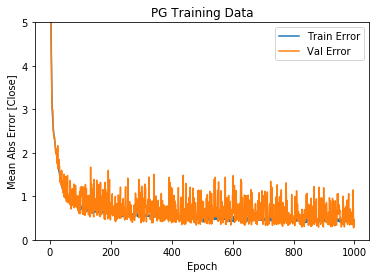

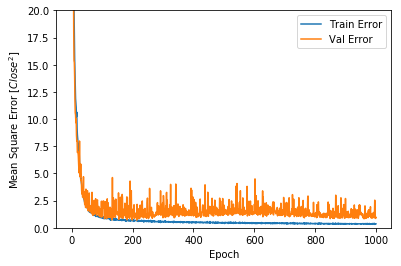

<Figure size 432x288 with 0 Axes>

In [138]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Close]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error'), plt.title(f'{ticker} Training Data'), plt.savefig(f'output_images/{ticker}_line.png')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error'), plt.title(f'{ticker} Training Data'), plt.savefig(f'output_images/{ticker}_line2.png')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Close^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error'), plt.savefig(f'output_images/{ticker}_line3.png')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error'), plt.savefig(f'output_images/{ticker}_line4.png')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
 #plt.savefig(f'output_images/{ticker}.png')
    

plot_history(history) 
#plt.savefig(f'output_images/{ticker}_line5.png')


.............................................................................................

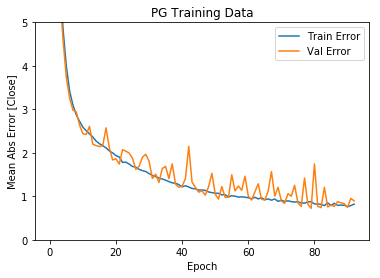

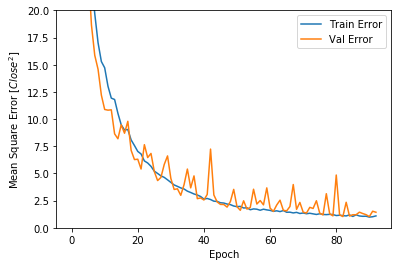

In [139]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)
             

In [86]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)



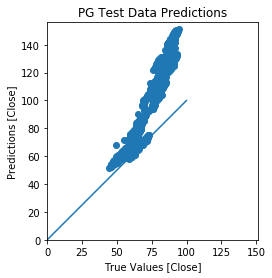

In [140]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Close]')
plt.ylabel('Predictions [Close]')
plt.title(f'{ticker} Test Data Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = (plt.plot([-100, 100], [-100, 100]), plt.savefig(f'output_images/{ticker}_test_predictions.png'))

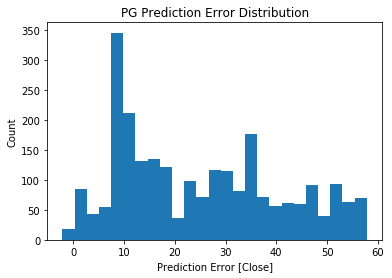

In [141]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.title(f'{ticker} Prediction Error Distribution')
plt.xlabel("Prediction Error [Close]")
plt.savefig(f'output_images/{ticker}_prediction_error.png')
_ = plt.ylabel("Count")

In [ ]:
sql = ('''SELECT * FROM stock_data.STOCH_MSFT
    INNER JOIN stock_data.ADX_MSFT ON 
    stock_data.STOCH_MSFT.index=stock_data.ADX_MSFT.index

In [14]:
sql = ('''SELECT * FROM stock_data.STOCH_MSFT
    INNER JOIN stock_data.ADX_MSFT ON 
    stock_data.STOCH_MSFT.index=stock_data.ADX_MSFT.index
    INNER JOIN stock_data.MACD_MSFT ON 
    stock_data.STOCH_MSFT.index=stock_data.MACD_MSFT.index
    INNER JOIN stock_data.RSI_MSFT ON 
    stock_data.STOCH_MSFT.index=stock_data.RSI_MSFT.index
    INNER JOIN stock_data.EMA_MSFT ON 
    stock_data.STOCH_MSFT.index=stock_data.EMA_MSFT.index
    INNER JOIN stock_data.BBANDS_MSFT ON 
    stock_data.STOCH_MSFT.index=stock_data.BBANDS_MSFT.index''')

In [15]:
MSFT_combo = pd.read_sql(sql, engine)

In [17]:
MSFT_combo = MSFT_combo.drop(columns=['level_0'])

In [ ]:
MSFT_combo = MSFT_combo[MSFT_combo['index'], MSFT_combo[]

In [ ]:
sql_1 = (
        f'SELECT * FROM stock_data.historical_data_{ticker} '
        f'INNER JOIN stock_data.MACD_{ticker} ON '
        f'stock_data.historical_data_{ticker}.Date=stock_data.MACD_{ticker}.index;')

In [7]:
ticker = "MSFT"
sql_1 = (
        f'SELECT * FROM stock_data.historical_data_{ticker} '
        f'INNER JOIN stock_data.MACD_{ticker} ON '
        f'stock_data.historical_data_{ticker}.Date=stock_data.MACD_{ticker}.index;')
#sql_2 = (f'ALTER TABLE {ticker} DROP date_key, DROP Symbol;')
print(sql_1)
engine.execute(sql_1)


SELECT * FROM stock_data.historical_data_PG INNER JOIN stock_data.MACD_PG ON stock_data.historical_data_PG.Date=stock_data.MACD_PG.index;


In [7]:
ticker = "MSFT"
sql_1 = (
        f'SELECT * FROM stock_data.historical_data_{ticker} '
        f'INNER JOIN stock_data.MACD_{ticker} ON '
        f'stock_data.historical_data_{ticker}.Date=stock_data.MACD_{ticker}.index;')
#sql_2 = (f'ALTER TABLE {ticker} DROP date_key, DROP Symbol;')
print(sql_1)
engine.execute(sql_1)


SELECT * FROM stock_data.historical_data_PG INNER JOIN stock_data.MACD_PG ON stock_data.historical_data_PG.Date=stock_data.MACD_PG.index;


In [7]:
ticker = "MSFT"
Measure = ""
sql_1 = (
        f'SELECT * FROM stock_data.historical_data_{ticker} '
        f'INNER JOIN stock_data.{Measure}_{ticker} ON '
        f'stock_data.historical_data_{ticker}.Date=stock_data.{Measure}_{ticker}.index;')
#sql_2 = (f'ALTER TABLE {ticker} DROP date_key, DROP Symbol;')
print(sql_1)
engine.execute(sql_1)


SELECT * FROM stock_data.historical_data_PG INNER JOIN stock_data.MACD_PG ON stock_data.historical_data_PG.Date=stock_data.MACD_PG.index;


In [12]:
MSFT_MACD = pd.read_sql(sql_1, engine)

In [ ]:
MSFT_MACD